In [16]:
import pandas as pd

# Load the CSV File
df = pd.read_csv('../Nestor/Resources/Input/Mortgages.csv')
print(df.head())

         DATE  MORTGAGE30US
0  1971-04-02          7.33
1  1971-04-09          7.31
2  1971-04-16          7.31
3  1971-04-23          7.31
4  1971-04-30          7.29


In [17]:
# Convert 'DATE' column to datetime format
df['DATE'] = pd.to_datetime(df['DATE'])

# Filter data for the date range between 2018 and 2024
filtered_df = df[(df['DATE'] >= '2018-01-01') & (df['DATE'] <= '2024-12-31')]

# Display the first few rows of the filtered data
print(filtered_df.head())

           DATE  MORTGAGE30US
2440 2018-01-04          3.95
2441 2018-01-11          3.99
2442 2018-01-18          4.04
2443 2018-01-25          4.15
2444 2018-02-01          4.22


In [18]:
# Group by year and month, and calculate the average mortgage rate for each group
filtered_df['YearMonth'] = filtered_df['DATE'].dt.to_period('M')  # Creates a year-month period column
monthly_avg = filtered_df.groupby('YearMonth')['MORTGAGE30US'].mean().reset_index()

# Display the first few rows of the grouped and averaged data
print(monthly_avg.head())

  YearMonth  MORTGAGE30US
0   2018-01        4.0325
1   2018-02        4.3300
2   2018-03        4.4440
3   2018-04        4.4675
4   2018-05        4.5860


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_500\3614059378.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['YearMonth'] = filtered_df['DATE'].dt.to_period('M')  # Creates a year-month period column


In [22]:
monthly_avg.to_csv('../Nestor/Resources/Output/mortgage_rates_bydate.csv', index=False)

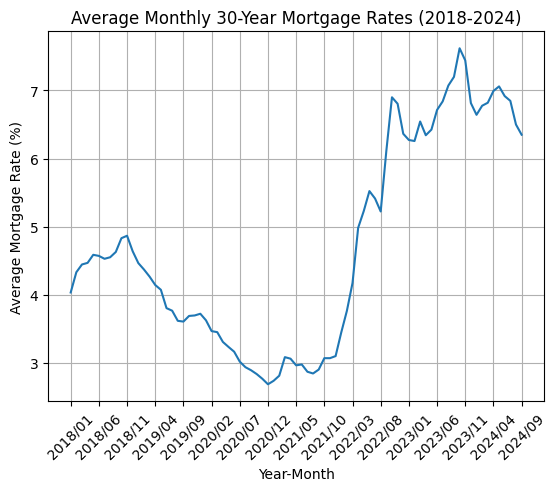

In [23]:
import matplotlib.pyplot as plt
# Plot the average 30-year mortgage rates per month
plt.plot(monthly_avg['YearMonth'].dt.strftime('%Y-%m'), monthly_avg['MORTGAGE30US'])
plt.title('Average Monthly 30-Year Mortgage Rates (2018-2024)')
plt.xlabel('Year-Month')
plt.ylabel('Average Mortgage Rate (%)')
plt.xticks(rotation=45)
plt.grid(True)

n = 5  # Adjust the value of n to change the frequency of ticks
plt.xticks(range(0, len(monthly_avg), n), monthly_avg['YearMonth'].dt.strftime('%Y/%m')[::n])
plt.show()

